In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Scikit Learn Imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
# Tensorflow Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense


In [2]:
# Import Data
data_import = pd.read_csv(".//house_predictions.csv")
print(data_import)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

## Prepare Data

In [3]:
# Create pandas dataframe
house_info = pd.DataFrame(data_import)
house_info.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Check for nulls
house_info.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
# Drop unnecessary columns
house_df = house_info.drop(columns=["guestroom", "prefarea", "furnishingstatus"], axis=1)
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,yes,no,no,yes,2
1,12250000,8960,4,4,4,yes,no,no,yes,3
2,12250000,9960,3,2,2,yes,yes,no,no,2
3,12215000,7500,4,2,2,yes,yes,no,yes,3
4,11410000,7420,4,1,2,yes,yes,no,yes,2


In [6]:
# Convert Yes/No to 1/0 for scaling
converted_house_df = house_df.copy()
converted_house_df[["mainroad", "basement", "hotwaterheating", "airconditioning"]] = converted_house_df[["mainroad", "basement", "hotwaterheating", "airconditioning"]].replace({"yes": 1, "no": 0})
converted_house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,1,0,0,1,2
1,12250000,8960,4,4,4,1,0,0,1,3
2,12250000,9960,3,2,2,1,1,0,0,2
3,12215000,7500,4,2,2,1,1,0,1,3
4,11410000,7420,4,1,2,1,1,0,1,2


In [7]:
# Split X and Y
y = converted_house_df["price"]

x = converted_house_df.copy()
x = x.drop(columns="price")

In [8]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

In [9]:
# Scale numeric data
scaler = StandardScaler().fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

## Create Models

In [10]:
# Score function
def score_model(y_test, y_predictions):
    r2_score = metrics.r2_score(y_test, y_predictions)
    rmse = metrics.root_mean_squared_error(y_test, y_predictions)
    mse = rmse ** 2
    print(f"R2 score: {r2_score}  Mean Square Error: {mse}  Root Mean Square Error: {rmse}")

In [11]:
# Initial Model - Linear Regression
linear_regression_model = LinearRegression()

linear_regression_model.fit(scaled_x_train, y_train)
lr_model_predictions = linear_regression_model.predict(scaled_x_test)


In [12]:
# Score model
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def score_model(y_test, y_predictions):
    r2 = r2_score(y_test, y_predictions)
    mse = mean_squared_error(y_test, y_predictions)
    rmse = np.sqrt(mse)
    print(f"R2 score: {r2}  Mean Squared Error: {mse}  Root Mean Squared Error: {rmse}")

# Assuming y_test and lr_model_predictions are defined
score_model(y_test, lr_model_predictions)


R2 score: 0.6101332275947472  Mean Squared Error: 1252183947657.4941  Root Mean Squared Error: 1119010.253598015


In [13]:
# Alternate model - Random Forest
random_forest_model = RandomForestRegressor(n_estimators=1000, random_state=4)

random_forest_model.fit(scaled_x_train, y_train)
rf_model_predictions = random_forest_model.predict(scaled_x_test)

In [14]:
# Score model
score_model(y_test, rf_model_predictions)

R2 score: 0.5253645263629891  Mean Squared Error: 1524446203533.577  Root Mean Squared Error: 1234684.6575274097


In [15]:
# Alternate model - Gradient Boosting Regression
gbr_model = GradientBoostingRegressor(n_estimators=1000, random_state=4)

gbr_model.fit(scaled_x_train, y_train)
gbr_model_predictions = gbr_model.predict(scaled_x_test)

In [16]:
# Score model
score_model(y_test, gbr_model_predictions)

R2 score: 0.43731582754579  Mean Squared Error: 1807243238507.416  Root Mean Squared Error: 1344337.4719568803


Epoch 1/200


c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 27153122983936.0000 - val_loss: 25585237622784.0000
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25620102774784.0000 - val_loss: 25582603599872.0000
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26398135681024.0000 - val_loss: 25557678948352.0000
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26826959224832.0000 - val_loss: 25416267988992.0000
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27239492091904.0000 - val_loss: 24793598394368.0000
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26291688439808.0000 - val_loss: 22886586777600.0000
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22769349689344.0000 - val_loss: 19058588123136.0000
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17618442387456.0000 - val_loss: 15365612503040.0000
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12708463247360.0000 - val_loss: 11017580969984.0000
Epoch 10/200

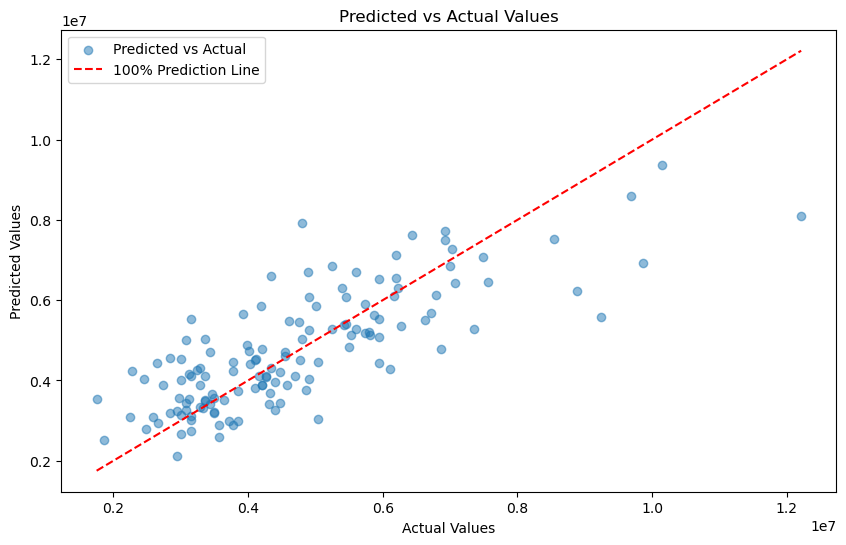

In [17]:
# Neural network model

# Build the neural network model
nn_model = Sequential([
    Dense(512, activation='linear', input_shape=(scaled_x_train.shape[1],)),
    Dense(256,activation='linear'),
    Dense(256, activation='linear'),
    Dense(128, activation='linear'),
    Dense(64, activation='linear'),
    Dense(1, activation='linear')  # Single output neuron for regression
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse')

# Train the model
nn_model.fit(scaled_x_train, y_train, epochs=200, validation_split=0.2)

# Make predictions 
y_pred = nn_model.predict(scaled_x_test).flatten()

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='100% Prediction Line')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


## Removing additional columns to attempt a more accurate model

In [19]:
# Reduce columns
reduced_x = x.copy()
reduced_x = reduced_x[['area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'airconditioning', 'parking']]

In [20]:
# Split and Scale reduced df
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(reduced_x, y, random_state=4)

scaler_2 = StandardScaler().fit(x_train_2)
scaled_x_train_2 = scaler_2.transform(x_train_2)
scaled_x_test_2 = scaler_2.transform(x_test_2)

In [21]:
# Linear Regression model 2
lr_model_2 = LinearRegression()

lr_model_2.fit(scaled_x_train_2, y_train_2)
lr_model_2_predictions = lr_model_2.predict(scaled_x_test_2)

In [22]:
# Score model
score_model(y_test_2, lr_model_2_predictions)

R2 score: 0.5933443555158762  Mean Squared Error: 1306106871087.8215  Root Mean Squared Error: 1142850.327509172


In [23]:
# Random Forest model 2
rf_model_2 = RandomForestRegressor(n_estimators=1000, random_state=4)

rf_model_2.fit(scaled_x_train_2, y_train_2)
rf_model_2_predictions = rf_model_2.predict(scaled_x_test_2)

In [24]:
# Score model
score_model(y_test_2, rf_model_2_predictions)

R2 score: 0.5418312807728376  Mean Squared Error: 1471557865769.3176  Root Mean Squared Error: 1213077.8481900152


In [25]:
# GBR model 2
gbr_model_2 = GradientBoostingRegressor(n_estimators=1000, random_state=4)

gbr_model_2.fit(scaled_x_train_2, y_train_2)
gbr_model_2_predictions = gbr_model_2.predict(scaled_x_test_2)

In [26]:
# Score model
score_model(y_test_2, gbr_model_2_predictions)

R2 score: 0.417923847057344  Mean Squared Error: 1869526891282.2131  Root Mean Squared Error: 1367306.4364955695


Epoch 1/100


c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 25961961619456.0000 - val_loss: 24781594296320.0000
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25843625623552.0000 - val_loss: 24781571227648.0000
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24160778584064.0000 - val_loss: 24781510410240.0000
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24705994063872.0000 - val_loss: 24781330055168.0000
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25647869067264.0000 - val_loss: 24780799475712.0000
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26299802320896.0000 - val_loss: 24779459395584.0000
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27073712226304.0000 - val_loss: 24776305278976.0000
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25301935456256.0000 - val_loss: 24769640529920.0000
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25343895273472.0000 - val_loss: 24756336197632.0000
Epoch 10/100

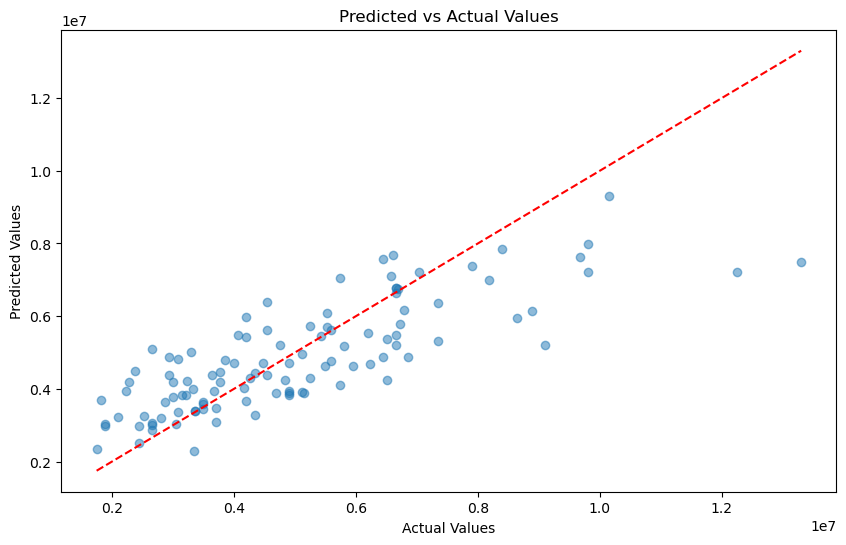

Mean Squared Error: 1931571115447.5115
R-squared: 0.617856509791586


In [31]:

# Load the CSV file into a DataFrame
data_import = pd.read_csv("./house_predictions.csv")

# Dropping unnecessary columns
house_df = data_import.drop(columns=["guestroom", "prefarea", "furnishingstatus"], axis=1)

# Converting Yes/No to 1/0 for scaling
house_df[["mainroad", "basement", "hotwaterheating", "airconditioning"]] = house_df[["mainroad", "basement", "hotwaterheating", "airconditioning"]].replace({"yes": 1, "no": 0})

# Handle missing values if any
house_df = house_df.fillna(house_df.mean())

# Splitting X and y
y = house_df["price"]
X = house_df.drop("price", axis=1)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model_2 = Sequential([
    Dense(64, activation='linear', input_shape=(X_train.shape[1],)),
    Dense(64, activation='linear'),
    Dense(64, activation='linear'),
    Dense(64, activation='linear'),
    Dense(1, activation='linear')  # Single output neuron for regression
])

# Compile the model
model_2.compile(optimizer='adam', loss='mse')

# Train the model
history = model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Make predictions
y_pred = model_2.predict(X_test).flatten()

# Plot the results
y_pred = model_2.predict(X_test).flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()





# Print the Mean Squared Error
mse = np.mean((y_pred - y_test)**2)
print(f"Mean Squared Error: {mse}")

# Calculate and print the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")




In [30]:
# Evaluate the model
loss = model_2.evaluate(scaled_x_test_2, y_test_2)

# Make predictions
model_2_predictions = model_2.predict(scaled_x_test_2)

# Score model
score_model(y_test_2, model_2_predictions)

InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/dense_6_1/Add defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\makhi\.anaconda3\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "c:\Users\makhi\.anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\makhi\.anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\makhi\.anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\makhi\AppData\Local\Temp\ipykernel_26816\2460029815.py", line 2, in <module>

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 432, in evaluate

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 165, in one_step_on_iterator

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 154, in one_step_on_data

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 82, in test_step

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\models\sequential.py", line 213, in call

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\models\functional.py", line 182, in call

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\models\functional.py", line 584, in call

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\layers\core\dense.py", line 146, in call

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\ops\numpy.py", line 168, in add

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\backend\tensorflow\sparse.py", line 493, in sparse_wrapper

  File "c:\Users\makhi\.anaconda3\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 38, in add

Matrix size-incompatible: In[0]: [32,7], In[1]: [9,64]
	 [[{{node sequential_1_1/dense_6_1/Add}}]] [Op:__inference_one_step_on_iterator_20302]

## Visualization

In [ ]:
# Visualization